<a href="https://colab.research.google.com/github/FelipeMoreira01/Machine-Learning-FCC/blob/main/Linear-Regression-Health-Costs-Calculator/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-01-06 18:06:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1         [ <=>                ]  49.09K  --.-KB/s    in 0s      

2021-01-06 18:06:25 (106 MB/s) - ‘insurance.csv.1’ saved [50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Convert categorical data to numbers

In [ ]:
dataset['sex'] = dataset['sex'].astype('category').cat.codes #sex =  {1: male, 0: female}
dataset['smoker'] = dataset['smoker'].astype('category').cat.codes # smoker = {0: no, 1: yes}
dataset['region'] = dataset['region'].astype('category').cat.codes # region = {0: northeast, 1: northwest, 2: southeast, 3: soutwest}

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


Split dataset into train and test

In [ ]:
dataset_copy = dataset.copy()

train_dataset = dataset_copy.sample(frac=0.8, random_state=0)
test_dataset = dataset_copy.drop(train_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


train_labels.head()

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
Name: expenses, dtype: float64

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
sex,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
smoker,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region,1070.0,1.501869,1.103399,0.0,1.0,2.0,2.0,3.0


Build model

In [ ]:
model = keras.Sequential([
                          layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                          #layers.Dropout(0.5),
                          layers.Dense(64, activation='relu'),
                          #layers.Dropout(0.5),
                          layers.Dense(64, activation='relu'),
                          #layers.Dropout(0.5),
                          layers.Dense(1)
])

optimizer = keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


Entrenar el modelo

In [ ]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels,
                    epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop]
)

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard

# Open an embedded TensorBoard viewer
#%tensorboard --logdir {logdir}/sizes

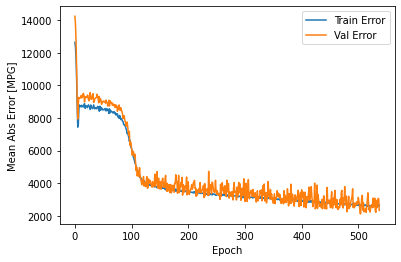

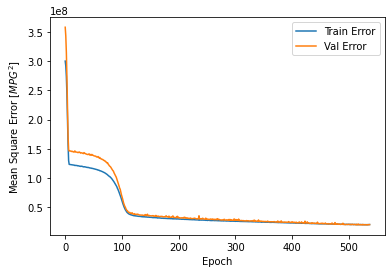

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

9/9 - 0s - loss: 33495708.0000 - mae: 2932.5935 - mse: 33495708.0000
Testing set Mean Abs Error: 2932.59 expenses
You passed the challenge. Great job!


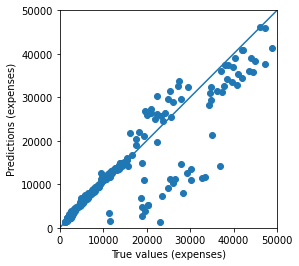

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
